In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
df_raw = pd.read_csv("/Users/haulam/Documents/bank-customer-churn-prediction-challenge/train.csv")
df_raw.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15709511.0,Ch'ang,754.0,Spain,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Genovese,579.0,France,Female,28.0,1.0,0.00,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Yeh,744.0,France,Female,56.0,5.0,0.00,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Nwachinemelu,697.0,France,Male,29.0,2.0,0.00,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Hs?eh,628.0,France,Female,22.0,9.0,0.00,2.0,1.0,0.0,49653.39,0.0


In [19]:
df_test = pd.read_csv("/Users/haulam/Documents/bank-customer-churn-prediction-challenge/test.csv")

Data Information

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


The data has 5 continuous variables and 5 categorical variables

In [21]:
df_raw.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.579653e+07,658.851467,37.888000,5.033333,43124.060479,1.590733,0.783200,0.500200,1.181348e+05,0.203867
std,4330.271354,1.270937e+07,72.587026,8.257409,2.808359,59777.868496,0.535587,0.412079,0.500017,4.680311e+04,0.402884
min,0.000000,1.556578e+07,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+01,0.000000
25%,3749.750000,1.563449e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.362960e+04,0.000000
50%,7499.500000,1.569053e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,1.235878e+05,0.000000
75%,11249.250000,1.575758e+07,709.000000,42.000000,7.000000,109650.982500,2.000000,1.000000,1.000000,1.575585e+05,0.000000
max,14999.000000,1.572242e+09,850.000000,74.000000,10.000000,187530.660000,4.000000,1.000000,1.000000,1.557802e+06,1.000000


In [22]:
print("Duplicated check: " ,df_raw.duplicated().sum())
print("Null value check:\n",df_raw.isna().sum())

Duplicated check:  0
Null value check:
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


The data doesn't contain duplicate and null values

In [23]:
df = df_raw.copy()

## Exploratory Data Analysis

**Exited Distribution**

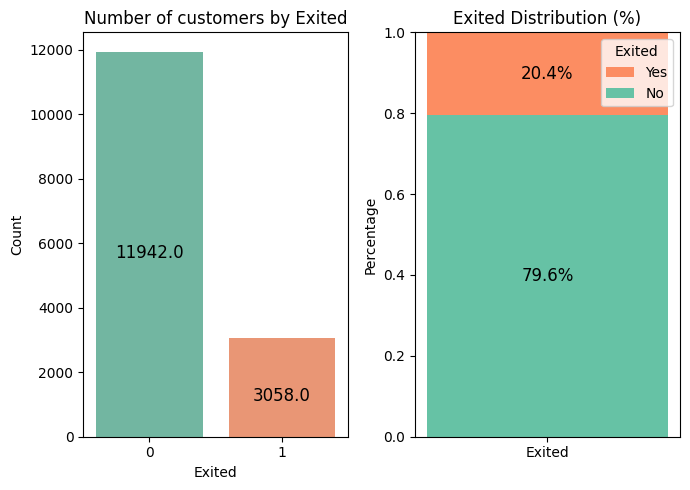

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5))
exited_counts = df['Exited'].value_counts(normalize=True).sort_index()
# Number of customers by Exited
sns.countplot(x='Exited', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Number of customers by Exited')
axes[0].set_xlabel('Exited')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['0', '1'])

for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                         ha='center', va='top', color='black', fontsize=12)

# Exited distribution
set2_colors = sns.color_palette('Set2')
axes[1].bar(['Exited'], [exited_counts.get(1.0, 0)], label='Yes', color=set2_colors[1], bottom=[exited_counts.get(0.0, 0)])
axes[1].bar(['Exited'], [exited_counts.get(0.0, 0)], label='No', color=set2_colors[0])
axes[1].set_title('Exited Distribution (%)')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 1)
axes[1].legend(title='Exited')
axes[1].set_xticks([0])
axes[1].set_xticklabels(['Exited'])

for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                         ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

The data experiences imbalance with only 20.4% of it are Exited group, will apply some methods to reduce the impact of the imbalance.

**OneHotEncoder for categorical variables**

In [25]:
# Geography
df['Geography'].value_counts()

Geography
France     8971
Spain      3321
Germany    2708
Name: count, dtype: int64

In [26]:
enc = OneHotEncoder(sparse_output=False)
geo_encoded = enc.fit_transform(df[['Geography']])
geo_encoded_df = pd.DataFrame(geo_encoded, columns=enc.get_feature_names_out(['Geography']))
df = pd.concat([df, geo_encoded_df], axis=1)

In [27]:
# Gender
df['Gender'].value_counts()

Gender
Male      8358
Female    6642
Name: count, dtype: int64

In [28]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

**Understanding of Categorical variables**

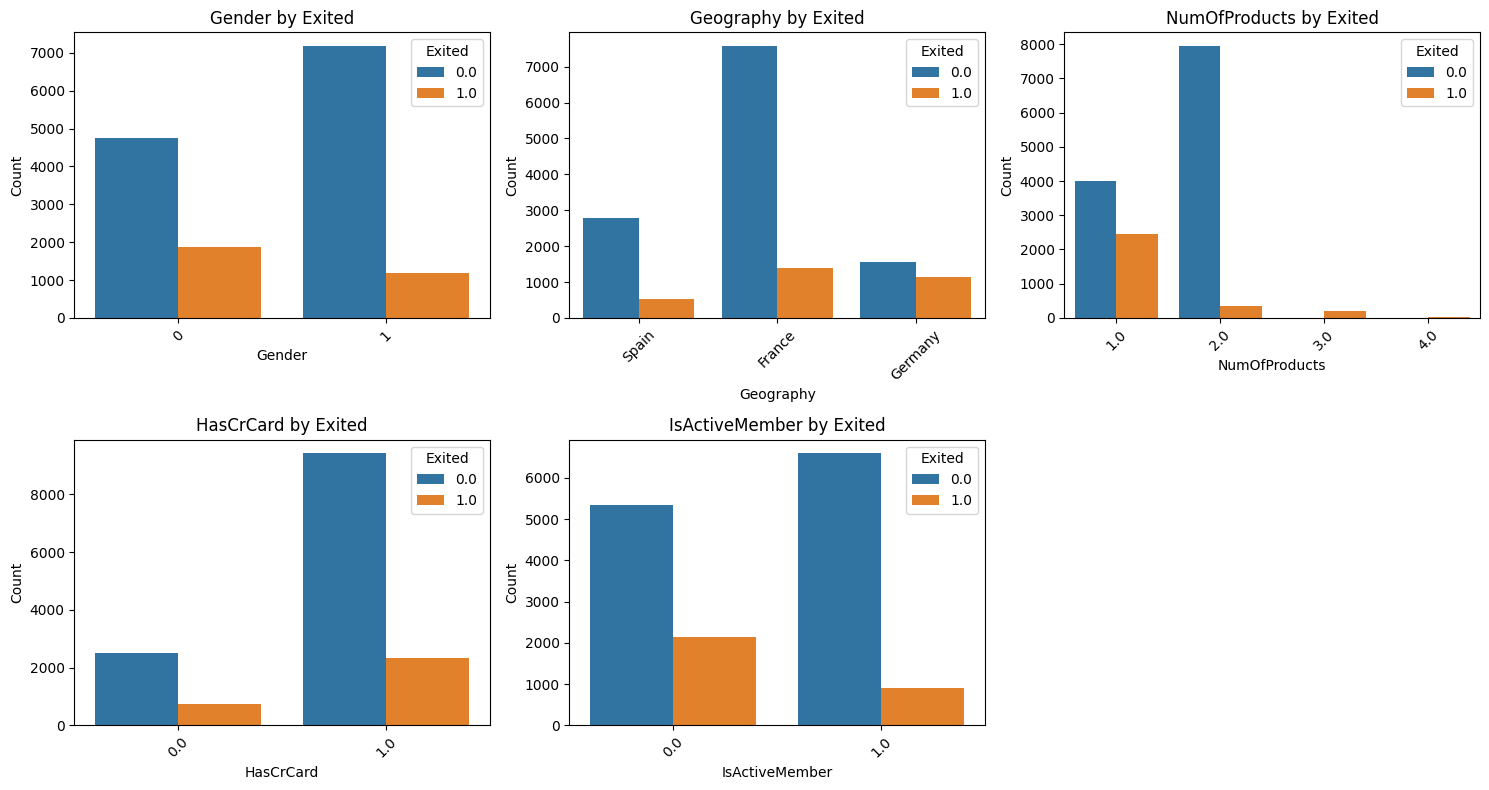

In [29]:
cat_cols = ['Gender', 'Geography','NumOfProducts', 'HasCrCard', 'IsActiveMember']
n_features = len(cat_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Exited', data=df, ax=axes[i], palette="tab10")
    axes[i].set_title(f'{col} by Exited')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Exited customers are likely female, French, Germany, having 1 or 3 or 4 products, having credit card but no longer active members

**Understanding of Numerical Variables**

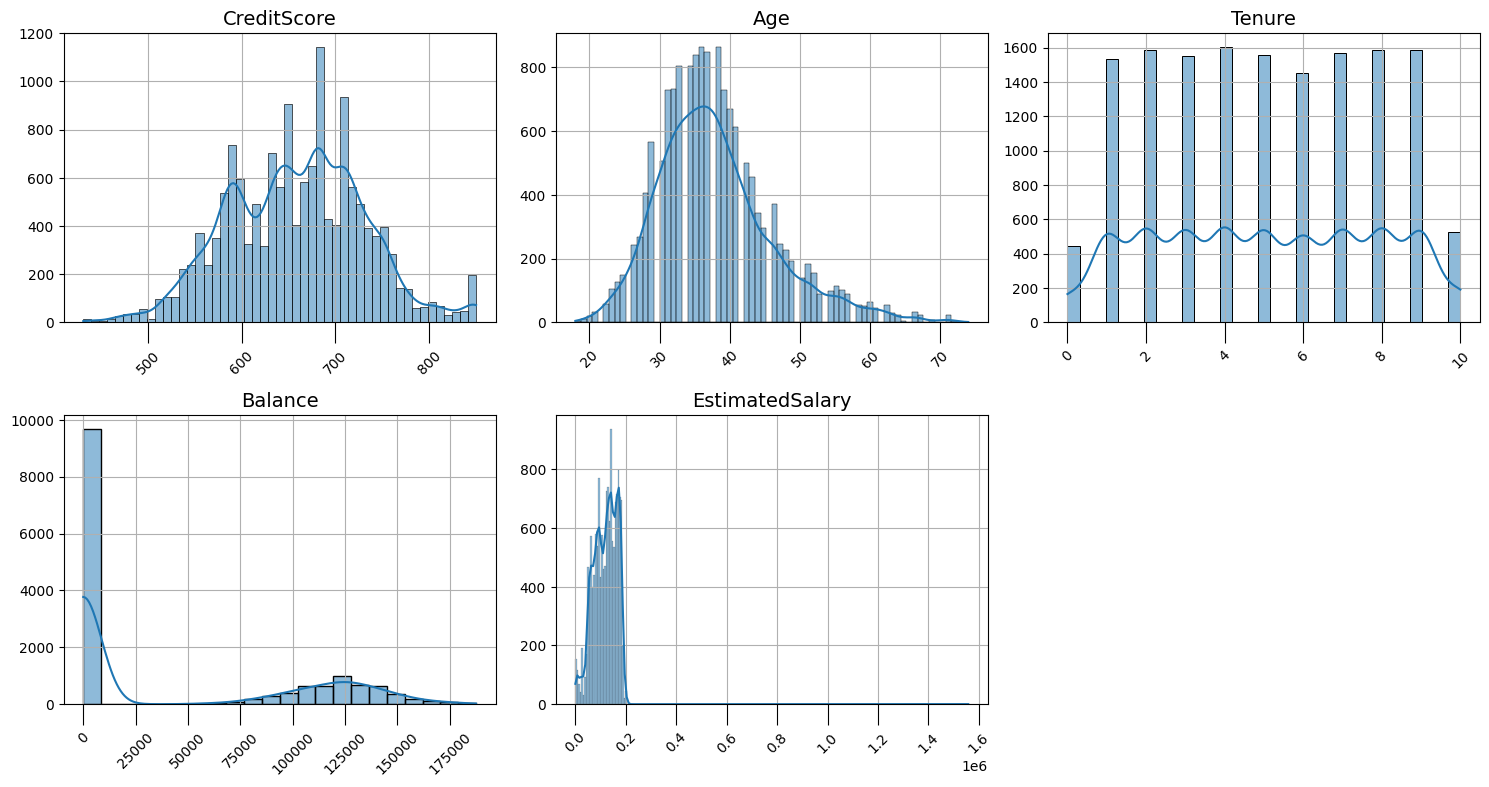

In [30]:
number_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
n_col = 3
n_features = len(df[number_cols].columns)
n_row = math.ceil(n_features / n_col)
fig, axes = plt.subplots(n_row, n_col, figsize=(5*n_col, 4* n_row))
axes=axes.flatten()
for i, col in enumerate(number_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45, size=15)
    axes[i].tick_params(axis='y', rotation=0)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- CreditScore: likely normal distribution, mainly ranging from 600-700
- Age: right skewness, mostly 30-40 years old customers
- Tenure: the distribution is quite equivalent among groups from 1 to 9 months
- Balance: most of customers don't have balance, the rest is ranging from 100k to 150k
- EstimatedSalary: extremely skewed on the right, maybe resulted from outliers

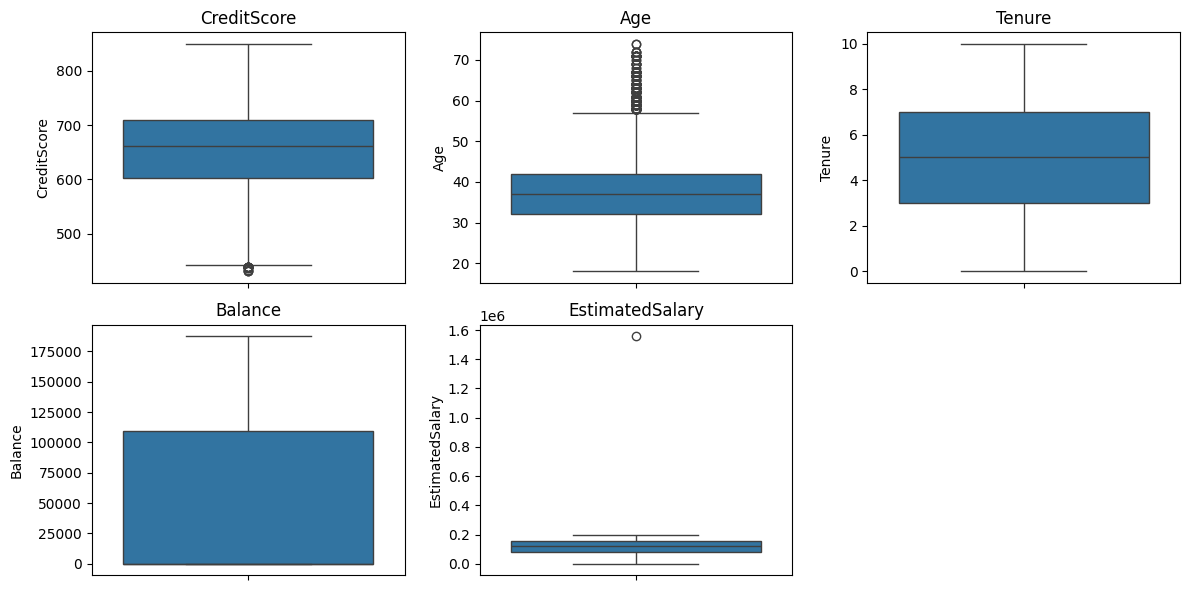

In [31]:
# Check outlier via boxplots
number_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
n_features = len(number_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(number_cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

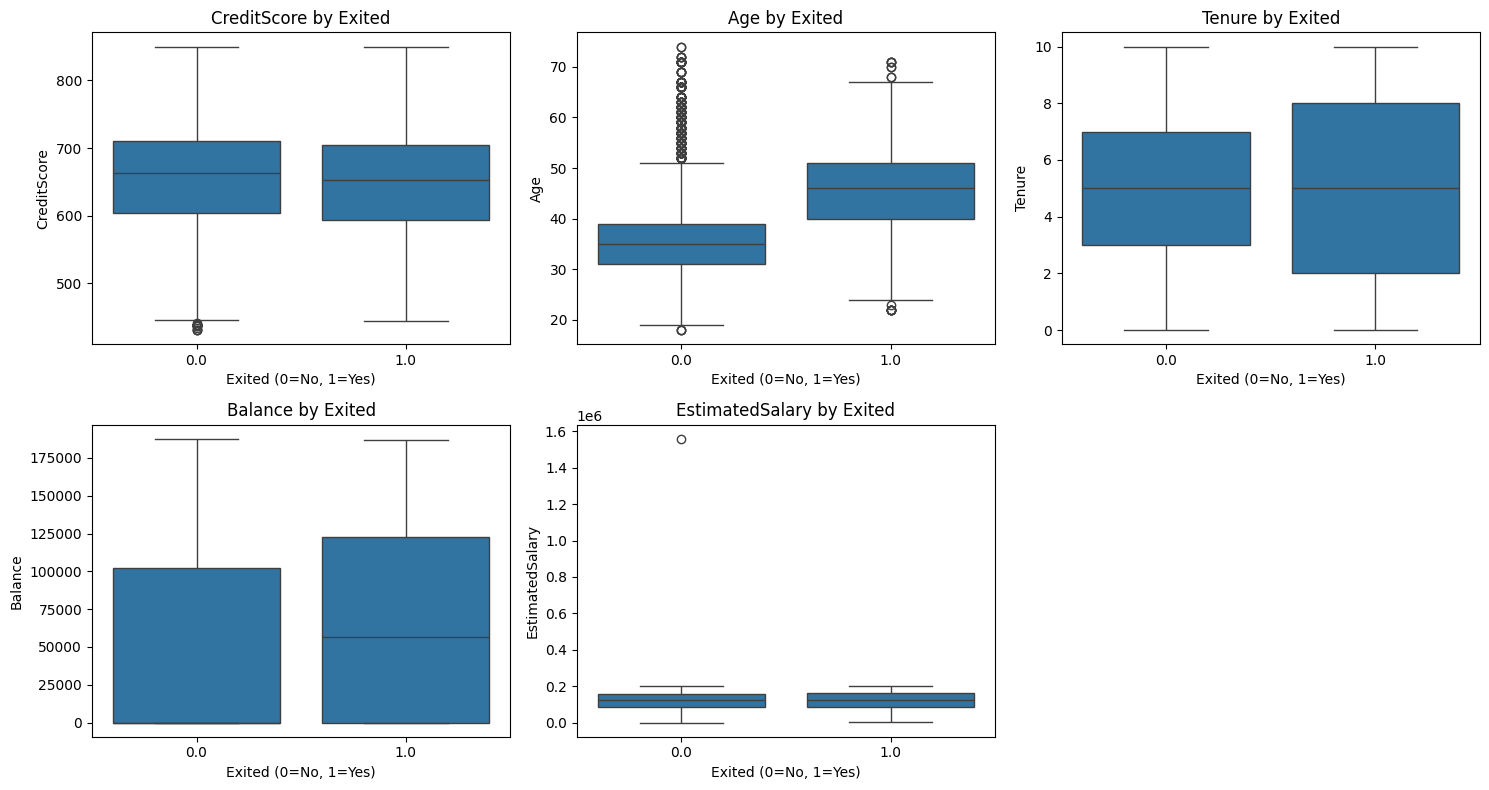

In [32]:
number_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
n_features = len(number_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(number_cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Exited')
    axes[i].set_xlabel('Exited (0=No, 1=Yes)')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

CreditScore, Age and EstimatedSalary witnessed outliers and will need to remove for better data quality

**Remove outliers**

In [33]:
class IQR():
    def __init__(self):
        self.lower = {}
        self.upper = {}
        self.outliers = 0
    def lower_upper_iqr(self, df, col, col_gr='Exited', factor=1.5):
        outlier_g = []
        for g in df[col_gr].unique():
            s = df.loc[df[col_gr] == g, col]
            Q1 = s.quantile(0.25)
            Q3 = s.quantile(0.75)
            IQR = Q3 - Q1
            lower = s[s >= (Q1 - factor * IQR)].min()
            upper = s[s <= (Q3 + factor * IQR)].max()
            print(f"Group {g} Lower:{len(s[s<lower])} Upper:{len(s[s>upper])}")
            self.lower[g] = lower
            self.upper[g] = upper
            outlier_g.append(len(s[s<lower]) + len(s[s>upper]))
        self.outliers = sum(outlier_g)

In [34]:
# Create objects for required columns
iqr_age = IQR()
iqr_crescore = IQR()
iqr_estsalary = IQR()

In [35]:
df1 = df.copy()

In [36]:
# Check the number of outliers
iqr_age.lower_upper_iqr(df1, 'Age')
iqr_age.lower, iqr_age.upper, iqr_age.outliers

Group 0.0 Lower:3 Upper:337
Group 1.0 Lower:8 Upper:8


({np.float64(0.0): np.float64(19.0), np.float64(1.0): np.float64(24.0)},
 {np.float64(0.0): np.float64(51.0), np.float64(1.0): np.float64(67.0)},
 356)

In [37]:
iqr_crescore.lower_upper_iqr(df1, 'CreditScore')
iqr_crescore.lower, iqr_crescore.upper, iqr_crescore.outliers

Group 0.0 Lower:16 Upper:0
Group 1.0 Lower:0 Upper:0


({np.float64(0.0): np.float64(446.0), np.float64(1.0): np.float64(445.0)},
 {np.float64(0.0): np.float64(850.0), np.float64(1.0): np.float64(850.0)},
 16)

In [38]:
iqr_estsalary.lower_upper_iqr(df1, 'EstimatedSalary')
iqr_estsalary.lower, iqr_estsalary.upper, iqr_estsalary.outliers

Group 0.0 Lower:0 Upper:1
Group 1.0 Lower:0 Upper:0


({np.float64(0.0): np.float64(11.58), np.float64(1.0): np.float64(479.54)},
 {np.float64(0.0): np.float64(199953.33),
  np.float64(1.0): np.float64(199992.48)},
 1)

In [39]:
# Create function to filter outliers for columns simultaneously
def compute_all_thresholds(df, cols, group_col, factor=1.5):
    thresholds = {}
    for col in cols:
        iqr = IQR()
        iqr.lower_upper_iqr(df, col, col_gr=group_col, factor=factor)
        thresholds[col] = (iqr.lower.copy(), iqr.upper.copy()) # save the values of upper, lower thresholds of each column
    return thresholds

def apply_all_thresholds(df, cols, group_col, thresholds):
    mask = pd.Series(True, index=df.index)
    for col in cols:
        lower_dict, upper_dict = thresholds[col]
        lower = df[group_col].map(lower_dict)
        upper = df[group_col].map(upper_dict)
        mask &= (df[col] >= lower) & (df[col] <= upper)
        #group_mask = df[group_col] == value
        #mask &= ~group_mask | ((df[col] >= lower) & (df[col] <= upper))
    return df[mask]

In [40]:
# apply all thresholds at once for 3 variables for group Non_Exited
cols = ['EstimatedSalary','CreditScore', 'Age']
thresholds = compute_all_thresholds(df1, cols, 'Exited')
df1 = apply_all_thresholds(df1, cols, 'Exited', thresholds)

Group 0.0 Lower:0 Upper:1
Group 1.0 Lower:0 Upper:0
Group 0.0 Lower:16 Upper:0
Group 1.0 Lower:0 Upper:0
Group 0.0 Lower:3 Upper:337
Group 1.0 Lower:8 Upper:8


In [41]:
print("df: ",df.shape)
print("df1: ",df1.shape)

df:  (15000, 17)
df1:  (14629, 17)


After removing outliers, let's check the boxplots again

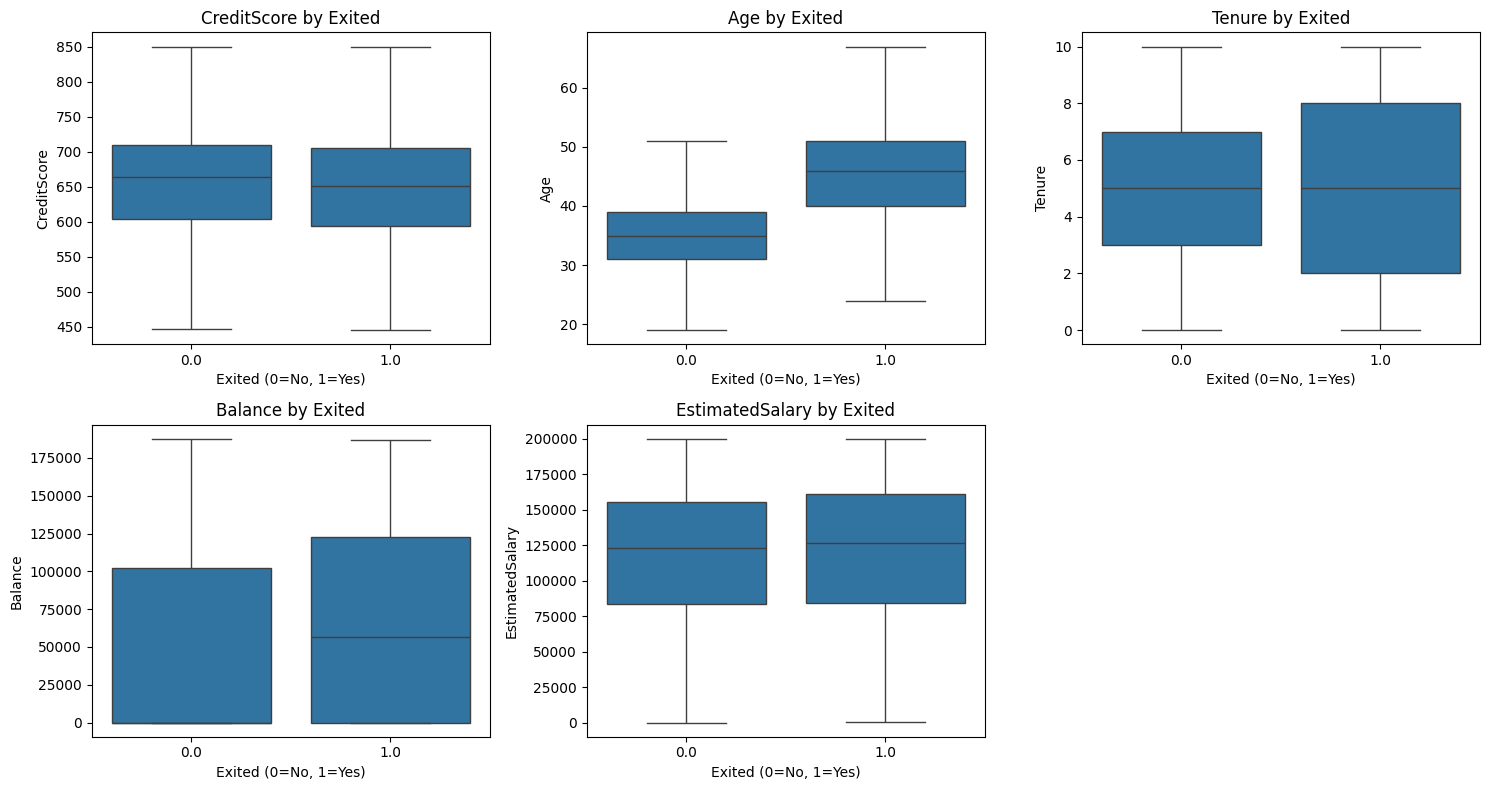

In [42]:
number_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
n_features = len(number_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(number_cols):
    sns.boxplot(x='Exited', y=col, data=df1, ax=axes[i])
    axes[i].set_title(f'{col} by Exited')
    axes[i].set_xlabel('Exited (0=No, 1=Yes)')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Now the data has no outliers.

## Feature Engineering

In [43]:
df1.drop(columns=['CustomerId', 'id', 'Geography', 'Surname'], inplace=True)

<Axes: >

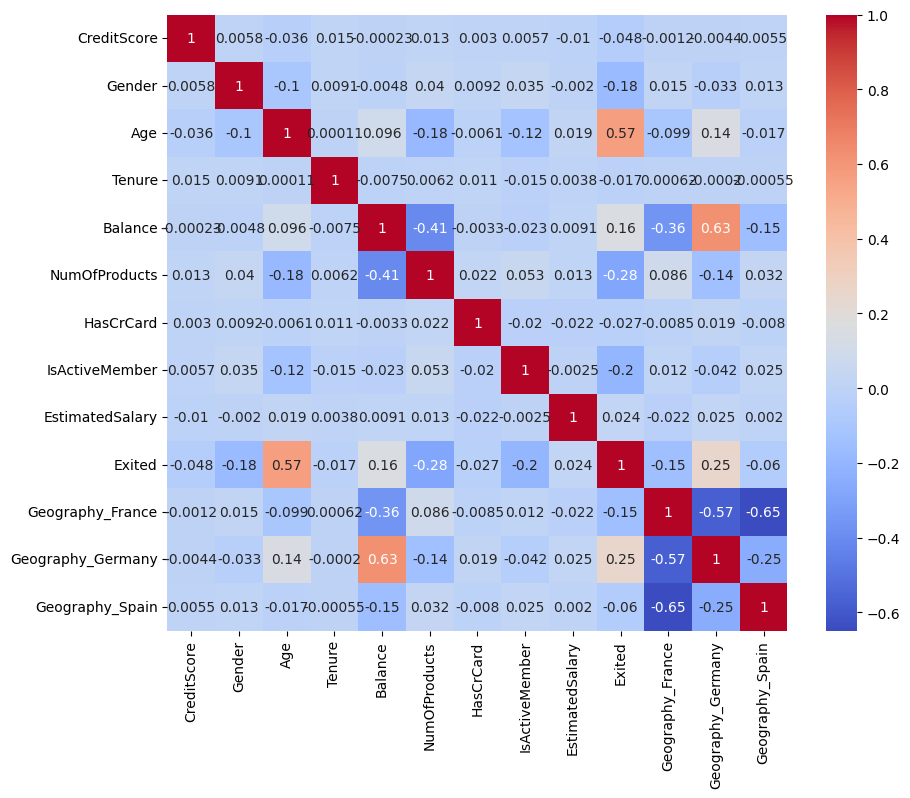

In [44]:
# Check correlation
corr = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [75]:
def feature_engineering(df):
    df['Tenure_Products_Ratio'] = df.apply(lambda x: (x['Tenure']+1)/x['NumOfProducts'], axis=1)
    df['Age_Tenure_Ratio'] = df['Age'] / (df['Tenure'] + 1)
    #df['Balance_Salary_Ratio'] = df.apply(lambda x: x['EstimatedSalary']/x['Balance'] if x['Balance'] > 0 else 0, axis=1)
    df['LogBalance'] = np.log(df['Balance'] + 1)
    #df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
    return df

In [46]:
df1 = feature_engineering(df1)

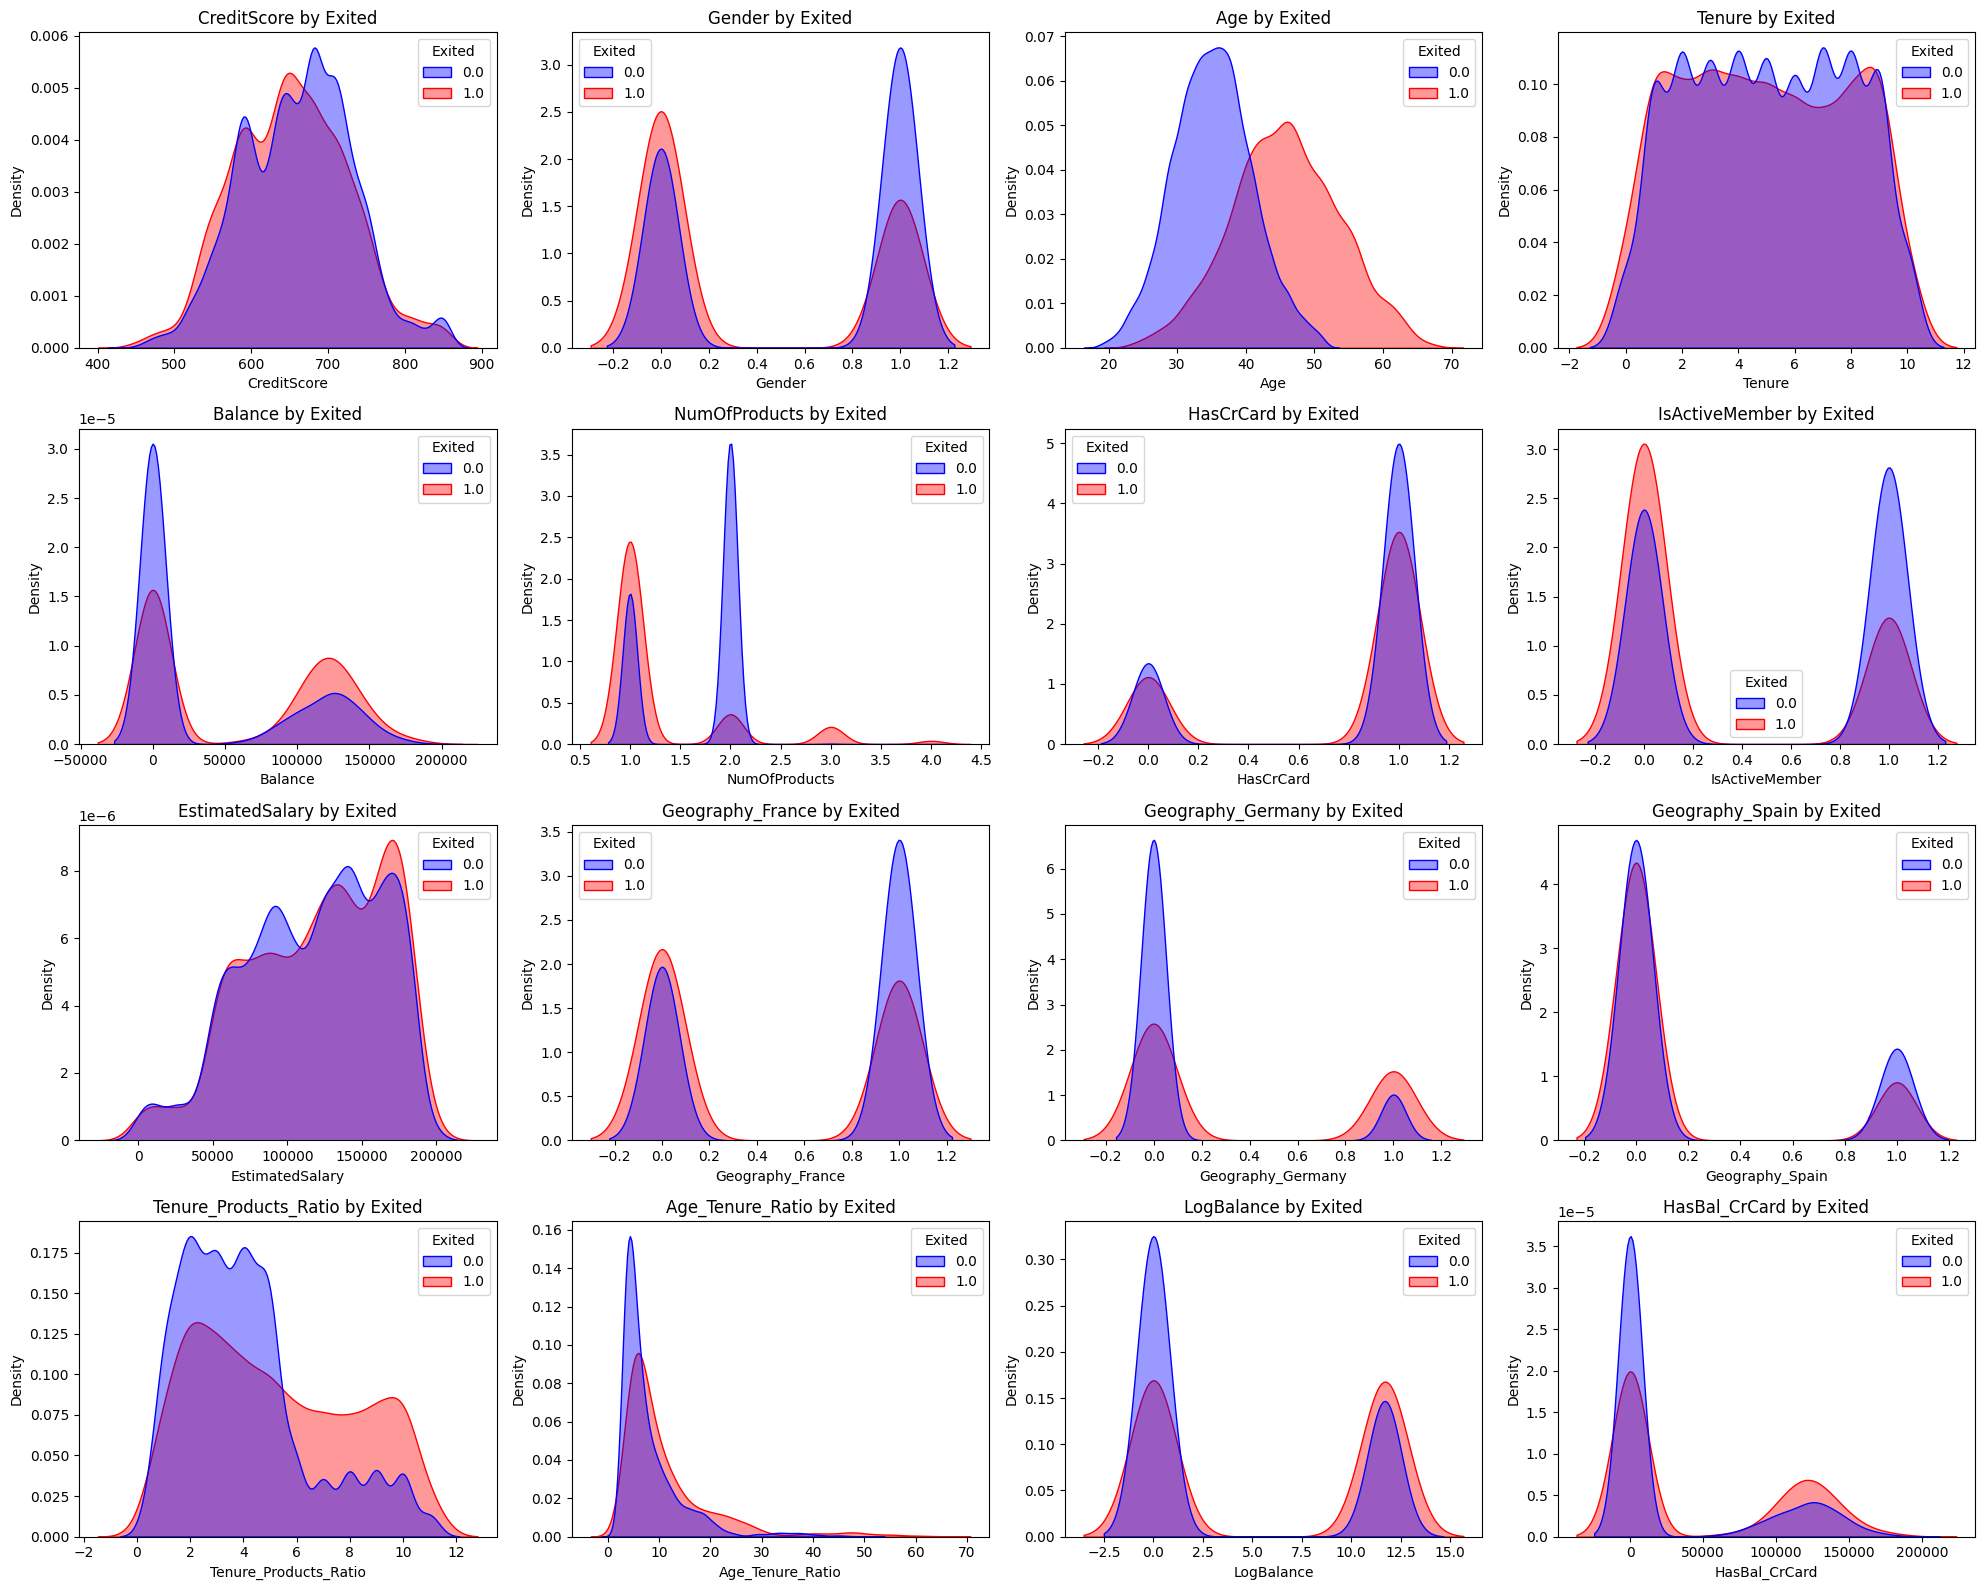

In [47]:
# List of numerical features to compare
number_cols = df1.drop(columns=['Exited']).select_dtypes(include=['int64', 'float64']).columns.tolist()
n_features = len(number_cols)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(number_cols):
    sns.kdeplot(data=df1, x=col, hue='Exited', fill=True, common_norm=False, 
                palette={0: 'blue', 1: 'red'}, alpha=0.4, ax=axes[i])
    axes[i].set_title(f'{col} by Exited')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Top variables might explain for Exited customers are: Gender, Age, Balance, NumOfProducts, IsActiveMember, Geography_France, Geography_Germany, and relevant features derived from them. 

Let's check the feature importance by using SelectKbest

In [48]:
# Create and fit the selector
df_select = df1.drop(columns=['Exited'])
selector = SelectKBest(f_classif)
selector.fit(df_select, df1['Exited'])

# Get scores for all features
feature_scores = selector.scores_
selected_indices = selector.get_support(indices=True)

# Get feature names
if hasattr(df_select, 'columns'):
    feature_names = df_select.columns
else:
    feature_names = [f'Feature_{i}' for i in range(df_select.shape[1])]

# Create ranking
feature_ranking = list(zip(feature_names, feature_scores))
feature_ranking.sort(key=lambda x: x[1], reverse=True)

# Print results
print("Feature Name                Score")
print("-" * 35)
for feature_name, score in feature_ranking:
    print(f"{feature_name:<20} {score:.4f}")

# plt.subplots(figsize = (5,5))
# sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
# plt.title('Correlation w.r.t Outcome');

Feature Name                Score
-----------------------------------
Age                  6968.2797
NumOfProducts        1286.5479
Geography_Germany    991.6208
IsActiveMember       603.0384
Tenure_Products_Ratio 553.6946
Gender               471.0958
Age_Tenure_Ratio     465.2493
Balance              365.4593
LogBalance           364.5685
Geography_France     326.4974
HasBal_CrCard        231.3000
Geography_Spain      52.1700
CreditScore          33.0776
HasCrCard            11.0341
EstimatedSalary      8.6730
Tenure               4.0040


Will remove Tenure, EstimatedSalary, HasCrCard, CreditScore, Geography_Spain and Balance (not LogBalance, because LogBalance can solve the skewness which might help for Regression model later on and still explain much about Exited)

<Axes: >

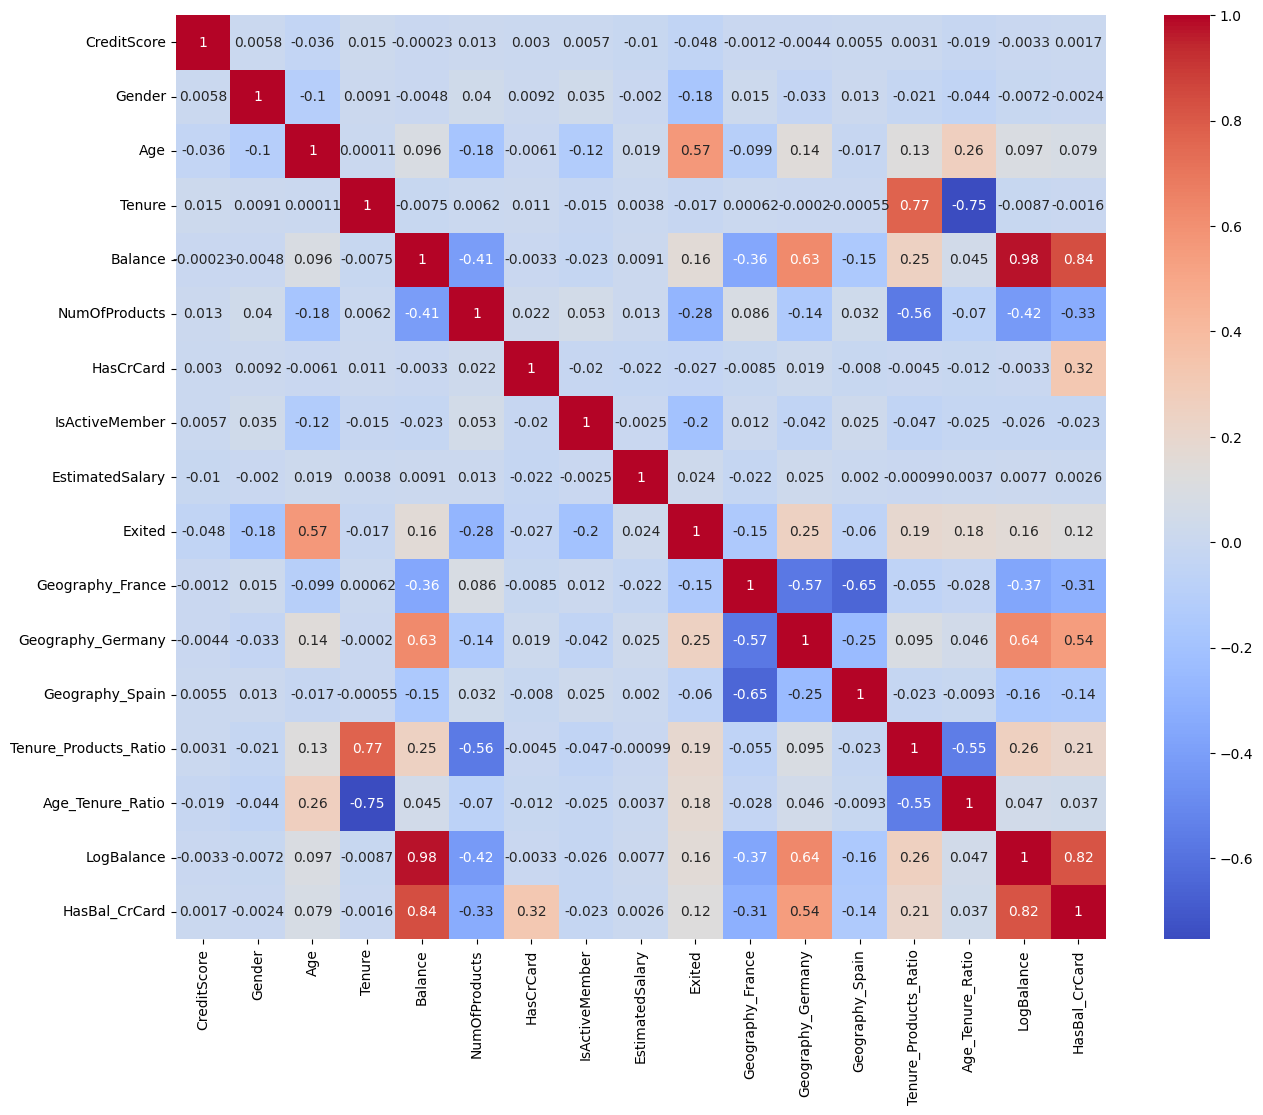

In [49]:
corr = df1.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [122]:
#X = df1.drop(columns=['Exited'])
X = df1[['Age', 'NumOfProducts', 'Geography_Germany', 'IsActiveMember', 
        'Tenure_Products_Ratio', 'Gender', 'Age_Tenure_Ratio', 'LogBalance', 
          'Geography_France']] 
y = df1['Exited']

## MODELING

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

**Train the model by using Random Forest**

In [268]:
# Train the model by using Random Forest

# Create complete pipeline (prevents data leakage)
def create_pipeline():
    return Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ])

# Define parameter grid
param_grid = {
    #'selector__k': range(5, X_train.shape[1] + 1),
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 10, 20]
}

# Single GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = create_pipeline()
grid_search_rf = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='f1',
    refit=True
)

grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_split': [2, 10, 20],
                         'clf__n_estimators': [100, 200]},
             scoring='f1')

In [124]:
# # Fit the model into the new data

# # 1. Define feature engineering function
# def preprocessing(X):
#     if not X.equals(X_train):
#         X = X.copy()
#         X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
#         enc = OneHotEncoder(sparse_output=False)
#         geo_encoded = enc.fit_transform(X[['Geography']])
#         geo_encoded_X = pd.DataFrame(geo_encoded, columns=enc.get_feature_names_out(['Geography']))
#         X = pd.concat([X, geo_encoded_X], axis=1)
#         X['Tenure_Products_Ratio'] = (X['Tenure'] + 1) / X['NumOfProducts']
#         X['Age_Tenure_Ratio'] = X['Age'] / (X['Tenure'] + 1)
#         X['LogBalance'] = np.log(X['Balance'] + 1)
#         # final selected features
#         X = X[['Age', 'NumOfProducts', 'Geography_Germany', 'IsActiveMember',
#         'Tenure_Products_Ratio', 'Gender', 'Age_Tenure_Ratio', 'LogBalance',
#         'Geography_France']]
#     return X

# # 2. Define which columns to transform
# numeric_features = ['Age', 'NumOfProducts', 'Geography_Germany', 'IsActiveMember',
#                    'Tenure_Products_Ratio', 'Age_Tenure_Ratio', 'LogBalance', 'Geography_France'] 

# pipeline = Pipeline([
#         ('preprocessing', FunctionTransformer(preprocessing)),
#         ('scaler', StandardScaler()),
#         ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
#     ])

# # Define parameter grid
# param_grid = {
#     #'selector__k': range(5, X_train.shape[1] + 1),
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [None, 10, 20],
#     'clf__min_samples_split': [2, 10, 20]
# }

# # Single GridSearchCV with cross-validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# #pipeline = create_pipeline()
# grid_search_rf = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=cv,
#     scoring='f1',
#     refit=True
# )

# # Usage example
# df_exam = pd.DataFrame({
#     'Geography': ['France', 'Germany'],
#     'Gender': ['Male', 'Female'],
#     'CreditScore': [650, 700],
#     'Age': [40, 35],
#     'Tenure': [3, 5],
#     'Balance': [120000, 80000],
#     'NumOfProducts': [1, 2],
#     'HasCrCard': [1, 1],
#     'IsActiveMember': [1, 0],
#     'EstimatedSalary': [50000, 60000]
# })

# pipeline.fit(df_exam, [1, 0])  # Replace with your real data
# grid_search_rf.fit(df_exam, [1, 0])


In [269]:
best_f1_score = grid_search_rf.best_score_
best_f1_score

np.float64(0.7445441419426209)

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2291
         1.0       0.74      0.79      0.76       635

    accuracy                           0.89      2926
   macro avg       0.84      0.85      0.85      2926
weighted avg       0.90      0.89      0.89      2926



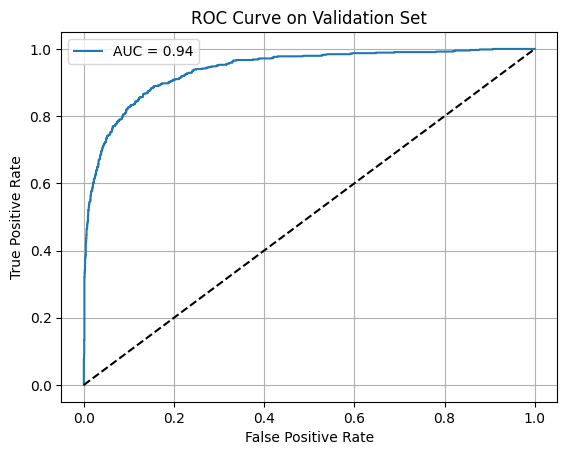

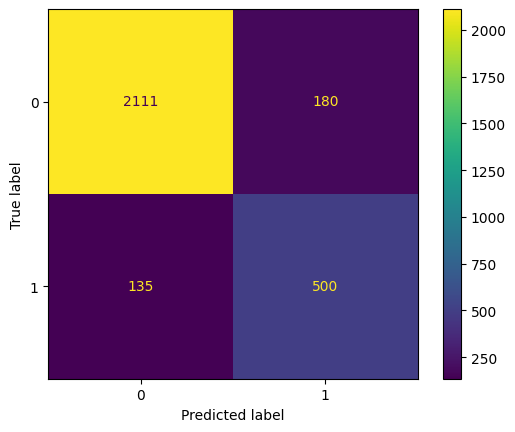

In [270]:
best_model = grid_search_rf.best_estimator_
y_test_prob= best_model.predict_proba(X_test)[:,1]
y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
y_test_pred = grid_search_rf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

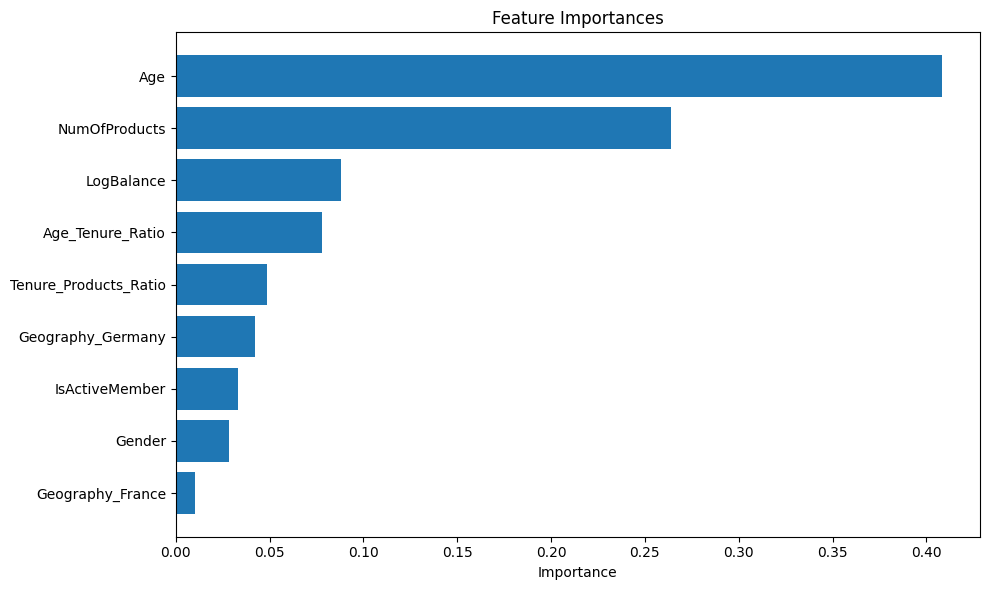

                 Feature  Importance
0                    Age    0.408138
1          NumOfProducts    0.263827
7             LogBalance    0.088012
6       Age_Tenure_Ratio    0.077984
4  Tenure_Products_Ratio    0.048419
2      Geography_Germany    0.041998
3         IsActiveMember    0.033166
5                 Gender    0.028179
8       Geography_France    0.010276


In [55]:
best_model = grid_search_rf.best_estimator_.named_steps['clf']
feature_importances = best_model.feature_importances_

selected_features = X_train.columns
# Combine into a DataFrame
feat_imp = pd.DataFrame({
                        'Feature': selected_features,
                        'Importance': feature_importances
                        }).sort_values(by='Importance', ascending=False)

# Combine into a DataFrame
feat_imp = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title(f'Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# print top features
print(feat_imp.head(10))

**Apply model to df_test for submission**

In [ ]:
# df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0})

# enc = OneHotEncoder(sparse_output=False)
# geo_encoded = enc.fit_transform(df_test[['Geography']])
# geo_encoded_df = pd.DataFrame(geo_encoded, columns=enc.get_feature_names_out(['Geography']))
# df_test = pd.concat([df_test, geo_encoded_df], axis=1)

In [ ]:
# df_test1 = feature_engineering(df_test)
# df_test1.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Tenure_Products_Ratio,Age_Tenure_Ratio,LogBalance,HasBal_CrCard
0,15000,15682433.0,Smith,751.0,France,0,38.0,3.0,0.00,2.0,1.0,0.0,145558.42,1.0,0.0,0.0,2.0,9.500000,0.000000,0.00
1,15001,15686835.0,T'ien,711.0,Germany,0,43.0,2.0,143680.36,2.0,1.0,1.0,118188.15,0.0,1.0,0.0,1.5,14.333333,11.875353,143680.36
2,15002,15784491.0,Ch'iu,592.0,Spain,1,40.0,4.0,0.00,2.0,1.0,1.0,36754.13,0.0,0.0,1.0,2.5,8.000000,0.000000,0.00
3,15003,15607986.0,Brown,676.0,Germany,1,48.0,5.0,121629.22,1.0,1.0,0.0,122221.71,0.0,1.0,0.0,6.0,8.000000,11.708741,121629.22
4,15004,15622003.0,Baresi,746.0,France,1,36.0,5.0,0.00,2.0,1.0,1.0,97468.44,1.0,0.0,0.0,3.0,6.000000,0.000000,0.00


In [ ]:
# features = X_train.columns.tolist()
# X_test_sub = df_test1[features]

In [ ]:
# y_test_sub = grid_search_rf.predict(X_test_sub)
# y_test_sub = pd.DataFrame(y_test_sub, columns=['Exited'])
# y_test_sub.head()

,Exited
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [ ]:
# df_test = pd.concat([df_test, y_test_sub], axis='columns')
# df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Tenure_Products_Ratio,Age_Tenure_Ratio,LogBalance,HasBal_CrCard,Exited
0,15000,15682433.0,Smith,751.0,France,0,38.0,3.0,0.00,2.0,...,0.0,145558.42,1.0,0.0,0.0,2.0,9.500000,0.000000,0.00,0.0
1,15001,15686835.0,T'ien,711.0,Germany,0,43.0,2.0,143680.36,2.0,...,1.0,118188.15,0.0,1.0,0.0,1.5,14.333333,11.875353,143680.36,1.0
2,15002,15784491.0,Ch'iu,592.0,Spain,1,40.0,4.0,0.00,2.0,...,1.0,36754.13,0.0,0.0,1.0,2.5,8.000000,0.000000,0.00,0.0
3,15003,15607986.0,Brown,676.0,Germany,1,48.0,5.0,121629.22,1.0,...,0.0,122221.71,0.0,1.0,0.0,6.0,8.000000,11.708741,121629.22,1.0
4,15004,15622003.0,Baresi,746.0,France,1,36.0,5.0,0.00,2.0,...,1.0,97468.44,1.0,0.0,0.0,3.0,6.000000,0.000000,0.00,0.0


In [ ]:
#df_test_sub = df_test[['id', 'Exited']]

In [ ]:
#df_test_sub.to_csv('df_test_sub.csv')

In [274]:
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [ ]:
# def preprocessing(X):
#     expected_columns = [
#         'Age', 'NumOfProducts', 'Geography_Germany', 'IsActiveMember',
#         'Tenure_Products_Ratio', 'Gender', 'Age_Tenure_Ratio', 'LogBalance',
#         'Geography_France'
#     ]

#     # Feature engineering
#     if 'Gender' in X.columns:
#         X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

#     if 'Geography' in X.columns:
#         X['Geography_France'] = (X['Geography'] == 'France').astype(int)
#         X['Geography_Germany'] = (X['Geography'] == 'Germany').astype(int)
#         # X['Geography_Spain'] = (X['Geography'] == 'Spain').astype(int)  # Not needed for model

#     if 'Tenure' in X.columns and 'NumOfProducts' in X.columns:
#         X['Tenure_Products_Ratio'] = X.apply(lambda x: (x['Tenure'] + 1) / x['NumOfProducts'] if x['NumOfProducts'] != 0 else 0, axis=1)

#     if 'Age' in X.columns and 'Tenure' in X.columns:
#         X['Age_Tenure_Ratio'] = X['Age'] / (X['Tenure'] + 1)

#     if 'Balance' in X.columns:
#         X['LogBalance'] = np.log(X['Balance'] + 1)

#     # Ensure all expected columns exist
#     for col in expected_columns:
#         if col not in X.columns:
#             X[col] = 0

#     # Return only the expected columns in the correct order
#     return X[expected_columns]



In [ ]:
# test_data = {
#     "Geography": "Germany",
#     "Gender": "Female",
#     "Age": 45,
#     "Balance": 0,
#     "IsActiveMember": 0,
#     "NumOfProducts:"
# }

In [225]:
# best_model.predict(processed_data)

array([0.])

In [ ]:
# def predict(data:dict):
#     #features = np.array(data[features].reshape(1,-1))
#     features = pd.DataFrame([data])
#     # Preprocess the input data
#     processed_data = preprocessing(features)
#     # Predict the class
#     prediction = "Churn" if best_model.predict(processed_data).astype(int)[0] == 1 else "Non-churn"
#     return {"Prediction": prediction}

In [ ]:
# #features = np.array(data[features].reshape(1,-1))
# features = pd.DataFrame([test_data])
# # Preprocess the input data
# processed_data = preprocessing(features)
# # Predict the class
# processed_data.head()

,Age,NumOfProducts,Geography_Germany,IsActiveMember,Tenure_Products_Ratio,Gender,Age_Tenure_Ratio,LogBalance,Geography_France
0,25,0,0,1,0,1,6.25,0.0,0


In [ ]:
# predict(test_data)

{'Prediction': 'Churn'}

In [ ]:
# url = 'http://18.141.223.144:8000/predict'
# query = "churn model"

In [ ]:
# import requests
# data = {
#     "Geography": "Germany",
#     "Gender": "Female",
#     "Age": 45,
#     "Balance": 0,
#     "IsActiveMember": 0,
#     "NumOfProducts": 0,
#     "Tenure"
# }

# res = requests.post(url, json=data)

# print("Status Code:", res.status_code)
# print("Result:", res.json())

Status Code: 200
Result: {'Prediction': 'Churn'}


In [ ]:
# json.load(response.text)['title']